In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from scipy import stats
from scipy.stats import skew
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, Normalizer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score, roc_auc_score
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline  
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import ConfusionMatrix
from sklearn.multiclass import OneVsRestClassifier
from datetime import datetime as dt
import warnings

from scipy.stats import randint, loguniform
from scipy.stats import uniform
from sklearn.model_selection import StratifiedKFold

warnings.filterwarnings('ignore')

In [3]:
#Define palette
pal = ["#274D60","#6BA3BE","#0C969C","#0A7075","#032F30", "#031716"]
cmap = ListedColormap(pal)
palette = pal

from matplotlib.colors import LinearSegmentedColormap
pal_1 = ["#032F30","#0A7075","#0C969C","#fff9e6","#ffebc6","#fcd997","#f5b971"]
palette_1 = pal_1

reversed_pal_1 = pal_1[::-1]

cmap_1 = LinearSegmentedColormap.from_list("reversed_blue_green_cmap", reversed_pal_1)

In [4]:
plt.rcParams['font.family'] = 'Times New Roman'

In [5]:
transaction_df=pd.read_csv('/Users/hominhtrung/Documents/Giáo Trình - FTU2/Năm 3/Phân tích dữ liệu/[PTDL] Final Project/transaction.csv', index_col=0)
customer_df=pd.read_csv('/Users/hominhtrung/Documents/Giáo Trình - FTU2/Năm 3/Phân tích dữ liệu/[PTDL] Final Project/customer_data_segmented.csv', index_col=0)
newwcustomer_df=pd.read_csv('/Users/hominhtrung/Documents/Giáo Trình - FTU2/Năm 3/Phân tích dữ liệu/[PTDL] Final Project/newcustomerlist.csv', index_col=0)

In [6]:
customer_df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,monetary,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B,tenure_valuation_mul,tenure_valuation_div,clusters
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,No,...,3018.09,1708.37,165.85,185.70,768.89,189.28,0.00,110,1.100000,3
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,No,...,2226.26,448.68,0.00,0.00,0.00,0.00,1777.58,160,1.600000,2
2,4,Talbot,Unknown,Male,33,1961-10-03,Others,IT,Mass Customer,No,...,220.57,41.13,0.00,0.00,179.44,0.00,0.00,63,0.777778,2
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Others,Affluent Customer,No,...,2394.94,1230.27,385.56,0.00,574.62,75.48,129.01,32,2.000000,0
4,6,Curr,Duckhouse,Male,35,1966-09-16,Others,Retail,High Net Worth,No,...,3946.55,1113.55,0.00,0.00,0.00,143.36,2689.64,117,1.444444,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,No,...,2045.84,0.00,318.66,0.00,1612.25,114.93,0.00,171,2.111111,2
3408,3497,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,No,...,1648.32,1504.50,0.00,0.00,143.82,0.00,0.00,90,3.600000,2
3409,3498,Lois,Abrahim,Female,28,1995-11-02,Others,Manufacturing,Mass Customer,No,...,3147.33,0.00,0.00,456.45,1434.00,143.36,1113.52,20,1.250000,1
3410,3499,Shelton,Tewkesberrie,Male,29,1979-06-17,Others,Manufacturing,Mass Customer,No,...,4955.25,880.01,167.21,0.00,616.90,0.00,3291.13,63,0.777778,3


# 1. Import Data

In [7]:
train = pd.merge(transaction_df, customer_df, how='inner', left_on='customer_id', right_on='customer_id')

In [8]:
train

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,monetary,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B,tenure_valuation_mul,tenure_valuation_div,clusters
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,645.99,448.68,0.00,0.00,197.31,0.00,0.00,60,1.666667,2
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,4179.11,492.78,0.00,0.00,880.35,1702.55,1103.43,50,2.000000,0
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,...,4965.43,0.00,445.21,1558.84,0.00,1891.83,1069.55,22,22.000000,0
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,...,3983.97,0.00,817.36,0.00,3023.25,143.36,0.00,160,1.600000,3
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,...,6646.00,2343.82,75.75,1166.54,1765.41,0.00,1294.48,14,0.285714,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19322,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,...,2497.80,0.00,0.00,1650.48,847.32,0.00,0.00,70,0.700000,1
19323,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,...,3993.71,0.00,182.81,1059.15,974.17,0.00,1777.58,19,19.000000,0
19324,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,...,4735.67,791.60,0.00,1592.19,17.87,0.00,2334.01,14,14.000000,0
19325,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,...,593.56,0.00,0.00,593.56,0.00,0.00,0.00,20,20.000000,2


In [9]:
test=newwcustomer_df

In [10]:
pd.set_option('display.max_columns', None)

train.head()


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,customer_age,recency,frequency,monetary,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B,tenure_valuation_mul,tenure_valuation_div,clusters
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,No,Yes,10,984 Hoepker Court,3064,VIC,Australia,6,62,76,3,645.99,448.68,0.00,0.00,197.31,0.00,0.00,60,1.666667,2
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,No,Yes,10,4 Shopko Circle,2196,NSW,Australia,5,38,21,7,4179.11,492.78,0.00,0.00,880.35,1702.55,1103.43,50,2.000000,0
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22,Berne,Donegan,Male,9,1977-06-03,Desktop Support Technician,Retail,Affluent Customer,No,No,22,586 Miller Parkway,2835,NSW,Australia,1,40,57,6,4965.43,0.00,445.21,1558.84,0.00,1891.83,1069.55,22,22.000000,0
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18,Titus,Worsall,Male,83,1962-01-14,Staff Scientist,Financial Services,Mass Customer,No,No,16,1617 Harper Parkway,2096,NSW,Australia,10,55,122,7,3983.97,0.00,817.36,0.00,3023.25,143.36,0.00,160,1.600000,3
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12,Norma,Batrim,Female,29,1996-12-15,Others,Retail,Affluent Customer,No,Yes,2,0601 Stephen Place,2292,NSW,Australia,7,21,76,10,6646.00,2343.82,75.75,1166.54,1765.41,0.00,1294.48,14,0.285714,1


In [11]:
test.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,No,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,No,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,No,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,No,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,No,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [12]:
train.dtypes

transaction_id                           int64
product_id                               int64
customer_id                              int64
transaction_date                        object
online_order                              bool
order_status                            object
brand                                   object
product_line                            object
product_class                           object
product_size                            object
list_price                             float64
standard_cost                          float64
product_first_sold_date                 object
first_name                              object
last_name                               object
gender                                  object
past_3_years_bike_related_purchases      int64
DOB                                     object
job_title                               object
job_industry_category                   object
wealth_segment                          object
deceased_indi

In [13]:
test.dtypes

first_name                              object
last_name                               object
gender                                  object
past_3_years_bike_related_purchases      int64
DOB                                     object
job_title                               object
job_industry_category                   object
wealth_segment                          object
deceased_indicator                      object
owns_car                                object
tenure                                   int64
address                                 object
postcode                                 int64
state                                   object
country                                 object
property_valuation                       int64
Rank                                     int64
Value                                  float64
dtype: object

In [14]:
test['new_customer_id']=test.index + 1
test['DOB'] = pd.to_datetime(test['DOB'])

train['customer_id']=train['customer_id'].astype('object')
train['DOB'] = pd.to_datetime(train['DOB'])

In [15]:
current_date = pd.to_datetime('2017-12-31')

test['customer_age'] = current_date.year - test['DOB'].dt.year

test['customer_age'] -= ((current_date.month < test['DOB'].dt.month) | 
                                  ((current_date.month == test['DOB'].dt.month) & 
                                   (current_date.day < test['DOB'].dt.day))).astype(int)


test['customer_age'] = test['customer_age'].astype("Int64")


test = test[(test['customer_age'] >= 14) & (test['customer_age'] <= 100)]


test['customer_age'].describe()

count        983.0
mean     46.206511
std      17.074268
min           15.0
25%           34.0
50%           45.0
75%           60.0
max           79.0
Name: customer_age, dtype: Float64

In [16]:
test["tenure_valuation_mul"] = test["tenure"] * test["property_valuation"]
test["tenure_valuation_div"] = test["tenure"] / test["property_valuation"]

In [17]:
age_bins = [14, 18, 25, 35, 50, 65, 100]
age_labels = ['Teen', 'Young Adult', 'Adult', 'Mid-age', 'Senior', 'Elderly']

test['age_group'] = pd.cut(
    test['customer_age'],  
    bins=age_bins,
    labels=age_labels,
    right=True 
)

test[['customer_age', 'age_group']].head()

,customer_age,age_group
0,60,Senior
1,47,Mid-age
2,43,Mid-age
3,38,Mid-age
4,52,Senior




| **Nhóm tuổi**             | **Độ tuổi** | **Mô tả hành vi**                                                                 |
|---------------------------|-------------|------------------------------------------------------------------------------------|
| **Teen (14–18)**          | 14–18       | Học sinh, dùng xe đạp đi học, vận động nhẹ                                         |
| **Young Adult (19–25)**   | 19–25       | Sinh viên, người mới đi làm, thích khám phá                                       |
| **Adult (26–35)**         | 26–35       | Đạp xe thể thao, giữ dáng, lifestyle năng động                                    |
| **Mid-age (36–50)**       | 36–50       | Gắn bó ổn định, thích đạp xe rèn luyện sức khỏe                                   |
| **Senior (51–65)**        | 51–65       | Quan tâm sức khỏe, đạp xe nhẹ nhàng, thường xuyên bảo trì                         |
| **Elderly (66–100)**      | 66–100      | Ít vận động, nếu đạp thì là xe nhẹ, thường sử dụng xe đạp điện hỗ trợ             |


In [18]:
train['age_group'] = pd.cut(
    train['customer_age'],  
    bins=age_bins,
    labels=age_labels,
    right=True 
)

In [19]:
train

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,customer_age,recency,frequency,monetary,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B,tenure_valuation_mul,tenure_valuation_div,clusters,age_group
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,No,Yes,10,984 Hoepker Court,3064,VIC,Australia,6,62,76,3,645.99,448.68,0.00,0.00,197.31,0.00,0.00,60,1.666667,2,Senior
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,No,Yes,10,4 Shopko Circle,2196,NSW,Australia,5,38,21,7,4179.11,492.78,0.00,0.00,880.35,1702.55,1103.43,50,2.000000,0,Mid-age
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22,Berne,Donegan,Male,9,1977-06-03,Desktop Support Technician,Retail,Affluent Customer,No,No,22,586 Miller Parkway,2835,NSW,Australia,1,40,57,6,4965.43,0.00,445.21,1558.84,0.00,1891.83,1069.55,22,22.000000,0,Mid-age
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18,Titus,Worsall,Male,83,1962-01-14,Staff Scientist,Financial Services,Mass Customer,No,No,16,1617 Harper Parkway,2096,NSW,Australia,10,55,122,7,3983.97,0.00,817.36,0.00,3023.25,143.36,0.00,160,1.600000,3,Senior
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12,Norma,Batrim,Female,29,1996-12-15,Others,Retail,Affluent Customer,No,Yes,2,0601 Stephen Place,2292,NSW,Australia,7,21,76,10,6646.00,2343.82,75.75,1166.54,1765.41,0.00,1294.48,14,0.285714,1,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19322,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,2003-07-23,Matthiew,Ferreras,Male,1,1994-11-27,Help Desk Operator,Manufacturing,Mass Customer,No,Yes,7,3 Hayes Court,3109,VIC,Australia,10,23,27,5,2497.80,0.00,0.00,1650.48,847.32,0.00,0.00,70,0.700000,1,Young Adult
19323,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,1997-05-12,Merrili,Whitear,Female,81,1974-12-03,Compensation Analyst,Financial Services,Mass Customer,No,No,19,0 Pearson Crossing,4405,QLD,Australia,1,43,24,10,3993.71,0.00,182.81,1059.15,974.17,0.00,1777.58,19,19.000000,0,Mid-age
19324,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,2010-08-22,Ola,Lenoir,Female,83,1974-02-16,Staff Accountant IV,Telecommunications,High Net Worth,No,No,14,10055 Old Shore Lane,3630,VIC,Australia,1,43,35,7,4735.67,791.60,0.00,1592.19,17.87,0.00,2334.01,14,14.000000,0,Mid-age
19325,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,2004-08-19,Callie,Coltart,Female,12,1955-03-29,Others,Financial Services,Mass Customer,No,Yes,20,1 Wayridge Park,4301,QLD,Australia,1,62,52,3,593.56,0.00,0.00,593.56,0.00,0.00,0.00,20,20.000000,2,Senior


In [20]:
test

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,new_customer_id,customer_age,tenure_valuation_mul,tenure_valuation_div,age_group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,No,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,1,60,84,2.333333,Senior
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,No,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,2,47,176,1.454545,Mid-age
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,No,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,3,43,50,2.000000,Mid-age
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,No,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,4,38,5,5.000000,Mid-age
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,No,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,5,52,171,2.111111,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,No,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374000,996,58,63,1.285714,Senior
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,No,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357000,997,16,60,0.600000,Teen
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,No,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357000,998,63,30,7.500000,Senior
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,No,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357000,999,65,38,9.500000,Senior


In [21]:
cols = [
    'gender',
    'past_3_years_bike_related_purchases',
    'job_title',
    'job_industry_category',
    'wealth_segment',
    'deceased_indicator',
    'owns_car',
    'tenure',
    'property_valuation',
    'state',
    'customer_age',
    'age_group',
    'tenure_valuation_mul',
    'tenure_valuation_div',
    'clusters',
]

train_df = train[cols]

In [22]:
train_df

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,property_valuation,state,customer_age,age_group,tenure_valuation_mul,tenure_valuation_div,clusters
0,Male,19,Software Engineer I,Financial Services,Mass Customer,No,Yes,10,6,VIC,62,Senior,60,1.666667,2
1,Female,89,Clinical Specialist,Health,Mass Customer,No,Yes,10,5,NSW,38,Mid-age,50,2.000000,0
2,Male,9,Desktop Support Technician,Retail,Affluent Customer,No,No,22,1,NSW,40,Mid-age,22,22.000000,0
3,Male,83,Staff Scientist,Financial Services,Mass Customer,No,No,16,10,NSW,55,Senior,160,1.600000,3
4,Female,29,Others,Retail,Affluent Customer,No,Yes,2,7,NSW,21,Young Adult,14,0.285714,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19322,Male,1,Help Desk Operator,Manufacturing,Mass Customer,No,Yes,7,10,VIC,23,Young Adult,70,0.700000,1
19323,Female,81,Compensation Analyst,Financial Services,Mass Customer,No,No,19,1,QLD,43,Mid-age,19,19.000000,0
19324,Female,83,Staff Accountant IV,Telecommunications,High Net Worth,No,No,14,1,VIC,43,Mid-age,14,14.000000,0
19325,Female,12,Others,Financial Services,Mass Customer,No,Yes,20,1,QLD,62,Senior,20,20.000000,2


In [67]:
newcus_df = test[[
    'gender',
    'past_3_years_bike_related_purchases',
    'job_title',
    'job_industry_category',
    'wealth_segment',
    'deceased_indicator',
    'owns_car',
    'tenure',
    'property_valuation',
    'state',
    'customer_age',
    'age_group',
    'tenure_valuation_mul',
    'tenure_valuation_div',
]]

In [68]:
newcus_df

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,property_valuation,state,customer_age,age_group,tenure_valuation_mul,tenure_valuation_div
0,Male,86,General Manager,Manufacturing,Mass Customer,No,Yes,14,6,QLD,60,Senior,84,2.333333
1,Male,69,Structural Engineer,Property,Mass Customer,No,No,16,11,NSW,47,Mid-age,176,1.454545
2,Female,10,Senior Cost Accountant,Financial Services,Affluent Customer,No,No,10,5,VIC,43,Mid-age,50,2.000000
3,Female,64,Account Representative III,Manufacturing,Affluent Customer,No,Yes,5,1,QLD,38,Mid-age,5,5.000000
4,Female,34,Financial Analyst,Financial Services,Affluent Customer,No,No,19,9,NSW,52,Senior,171,2.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Male,60,Paralegal,Financial Services,Affluent Customer,No,No,9,7,NSW,58,Senior,63,1.285714
996,Male,22,Senior Sales Associate,Health,Mass Customer,No,No,6,10,NSW,16,Teen,60,0.600000
997,Female,17,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,No,Yes,15,2,QLD,63,Senior,30,7.500000
998,Male,30,Financial Advisor,Financial Services,Mass Customer,No,Yes,19,2,QLD,65,Senior,38,9.500000


In [25]:
train_df.select_dtypes(exclude='object').columns

Index(['past_3_years_bike_related_purchases', 'tenure', 'property_valuation',
       'customer_age', 'age_group', 'tenure_valuation_mul',
       'tenure_valuation_div', 'clusters'],
      dtype='object')

# 2. Data preprocessing

In [26]:
X_df_train=train_df[['gender', 'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'property_valuation', 'state', 'customer_age',
       'age_group', 'tenure_valuation_mul', 'tenure_valuation_div']]

In [27]:
X_df_train

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,property_valuation,state,customer_age,age_group,tenure_valuation_mul,tenure_valuation_div
0,Male,19,Software Engineer I,Financial Services,Mass Customer,No,Yes,10,6,VIC,62,Senior,60,1.666667
1,Female,89,Clinical Specialist,Health,Mass Customer,No,Yes,10,5,NSW,38,Mid-age,50,2.000000
2,Male,9,Desktop Support Technician,Retail,Affluent Customer,No,No,22,1,NSW,40,Mid-age,22,22.000000
3,Male,83,Staff Scientist,Financial Services,Mass Customer,No,No,16,10,NSW,55,Senior,160,1.600000
4,Female,29,Others,Retail,Affluent Customer,No,Yes,2,7,NSW,21,Young Adult,14,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19322,Male,1,Help Desk Operator,Manufacturing,Mass Customer,No,Yes,7,10,VIC,23,Young Adult,70,0.700000
19323,Female,81,Compensation Analyst,Financial Services,Mass Customer,No,No,19,1,QLD,43,Mid-age,19,19.000000
19324,Female,83,Staff Accountant IV,Telecommunications,High Net Worth,No,No,14,1,VIC,43,Mid-age,14,14.000000
19325,Female,12,Others,Financial Services,Mass Customer,No,Yes,20,1,QLD,62,Senior,20,20.000000


In [28]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numerical_features = ['past_3_years_bike_related_purchases', 'tenure', 'property_valuation',
       'customer_age', 'tenure_valuation_mul',
       'tenure_valuation_div']
categorical_features = ['gender', 'job_title', 'job_industry_category', 'wealth_segment','age_group',
       'deceased_indicator', 'owns_car', 'state']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [29]:
X = X_df_train

In [30]:
X

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,property_valuation,state,customer_age,age_group,tenure_valuation_mul,tenure_valuation_div
0,Male,19,Software Engineer I,Financial Services,Mass Customer,No,Yes,10,6,VIC,62,Senior,60,1.666667
1,Female,89,Clinical Specialist,Health,Mass Customer,No,Yes,10,5,NSW,38,Mid-age,50,2.000000
2,Male,9,Desktop Support Technician,Retail,Affluent Customer,No,No,22,1,NSW,40,Mid-age,22,22.000000
3,Male,83,Staff Scientist,Financial Services,Mass Customer,No,No,16,10,NSW,55,Senior,160,1.600000
4,Female,29,Others,Retail,Affluent Customer,No,Yes,2,7,NSW,21,Young Adult,14,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19322,Male,1,Help Desk Operator,Manufacturing,Mass Customer,No,Yes,7,10,VIC,23,Young Adult,70,0.700000
19323,Female,81,Compensation Analyst,Financial Services,Mass Customer,No,No,19,1,QLD,43,Mid-age,19,19.000000
19324,Female,83,Staff Accountant IV,Telecommunications,High Net Worth,No,No,14,1,VIC,43,Mid-age,14,14.000000
19325,Female,12,Others,Financial Services,Mass Customer,No,Yes,20,1,QLD,62,Senior,20,20.000000


In [31]:
y=train_df['clusters']

In [32]:
y

0        2
1        0
2        0
3        3
4        1
        ..
19322    1
19323    0
19324    0
19325    2
19326    1
Name: clusters, Length: 19327, dtype: int64

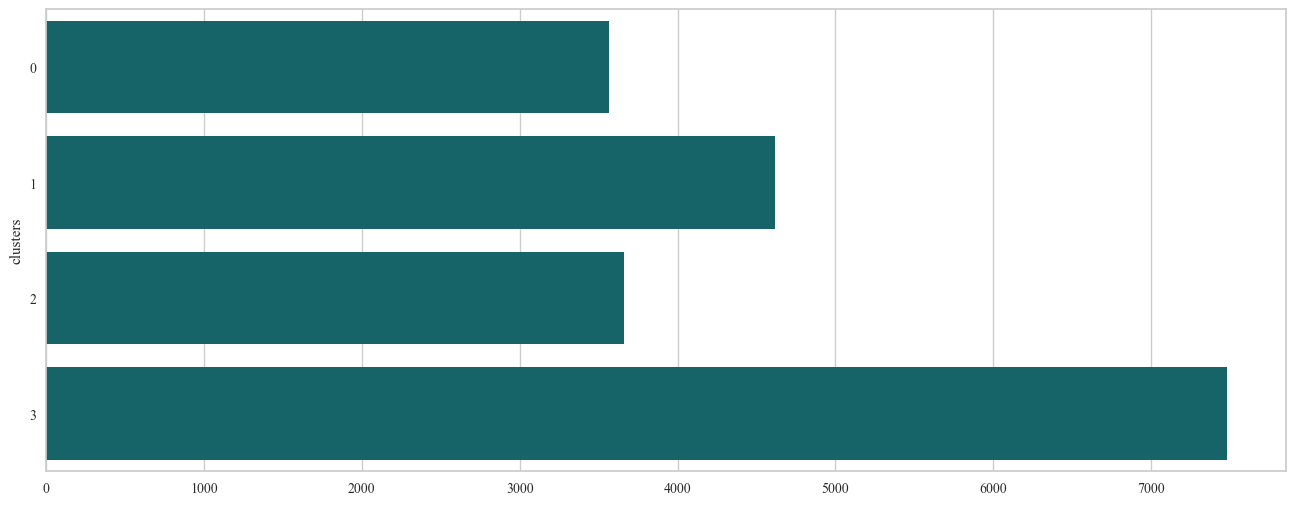

In [33]:
y_counts = y.value_counts()
plt.figure(figsize=(16, 6))
sns.barplot(y=y_counts.index, x=y_counts.values,color='#0A7075', orient='h')
plt.show()

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score , recall_score, accuracy_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer
from sklearn.metrics import classification_report, confusion_matrix

from yellowbrick.classifier import ConfusionMatrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.exceptions import ConvergenceWarning

from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=123,test_size=0.20)

In [36]:
X_train

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,property_valuation,state,customer_age,age_group,tenure_valuation_mul,tenure_valuation_div
15963,Male,37,Dental Hygienist,Health,High Net Worth,No,Yes,2,10,NSW,17,Teen,20,0.200000
3897,Female,40,Account Executive,Manufacturing,Mass Customer,No,Yes,7,8,QLD,51,Senior,56,0.875000
4967,Female,82,Assistant Media Planner,Entertainment,Mass Customer,No,No,16,7,VIC,36,Mid-age,112,2.285714
14701,Male,12,Others,Manufacturing,High Net Worth,No,Yes,15,10,NSW,53,Senior,150,1.500000
9021,Female,41,Chemical Engineer,Manufacturing,Mass Customer,No,Yes,5,9,VIC,50,Mid-age,45,0.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13435,Female,23,Technical Writer,Retail,Mass Customer,No,Yes,7,12,NSW,63,Senior,84,0.583333
7763,Female,95,Environmental Tech,Manufacturing,Mass Customer,No,No,8,4,QLD,44,Mid-age,32,2.000000
15377,Male,40,Environmental Tech,Financial Services,Mass Customer,No,Yes,22,1,QLD,40,Mid-age,22,22.000000
17730,Female,17,Research Associate,Retail,Mass Customer,No,Yes,14,8,NSW,55,Senior,112,1.750000


In [37]:
y_train

15963    1
3897     1
4967     3
14701    3
9021     1
        ..
13435    2
7763     0
15377    0
17730    2
15725    1
Name: clusters, Length: 15461, dtype: int64

# 3. Data modeling

## 3.1. Logistic Regression

In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

numerical_features = [
    'past_3_years_bike_related_purchases', 'tenure', 'property_valuation',
    'customer_age', 'tenure_valuation_mul', 'tenure_valuation_div'
]

categorical_features = [
    'gender', 'job_title', 'job_industry_category', 'wealth_segment',
    'age_group', 'deceased_indicator', 'owns_car', 'state'
]

numerical_transformer = StandardScaler()
categorical_transformer = OrdinalEncoder(
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

logreg = LogisticRegression(random_state=123)
pipeline = make_pipeline(preprocessor, logreg)

param_grid = {
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__C': [0.1, 1, 10],
    'logisticregression__solver': ['liblinear'],
    'logisticregression__max_iter': [100, 300, 500]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best CV Accuracy:", round(grid_search.best_score_, 4))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Hyperparameters: {'logisticregression__C': 10, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
Best CV Accuracy: 0.7563


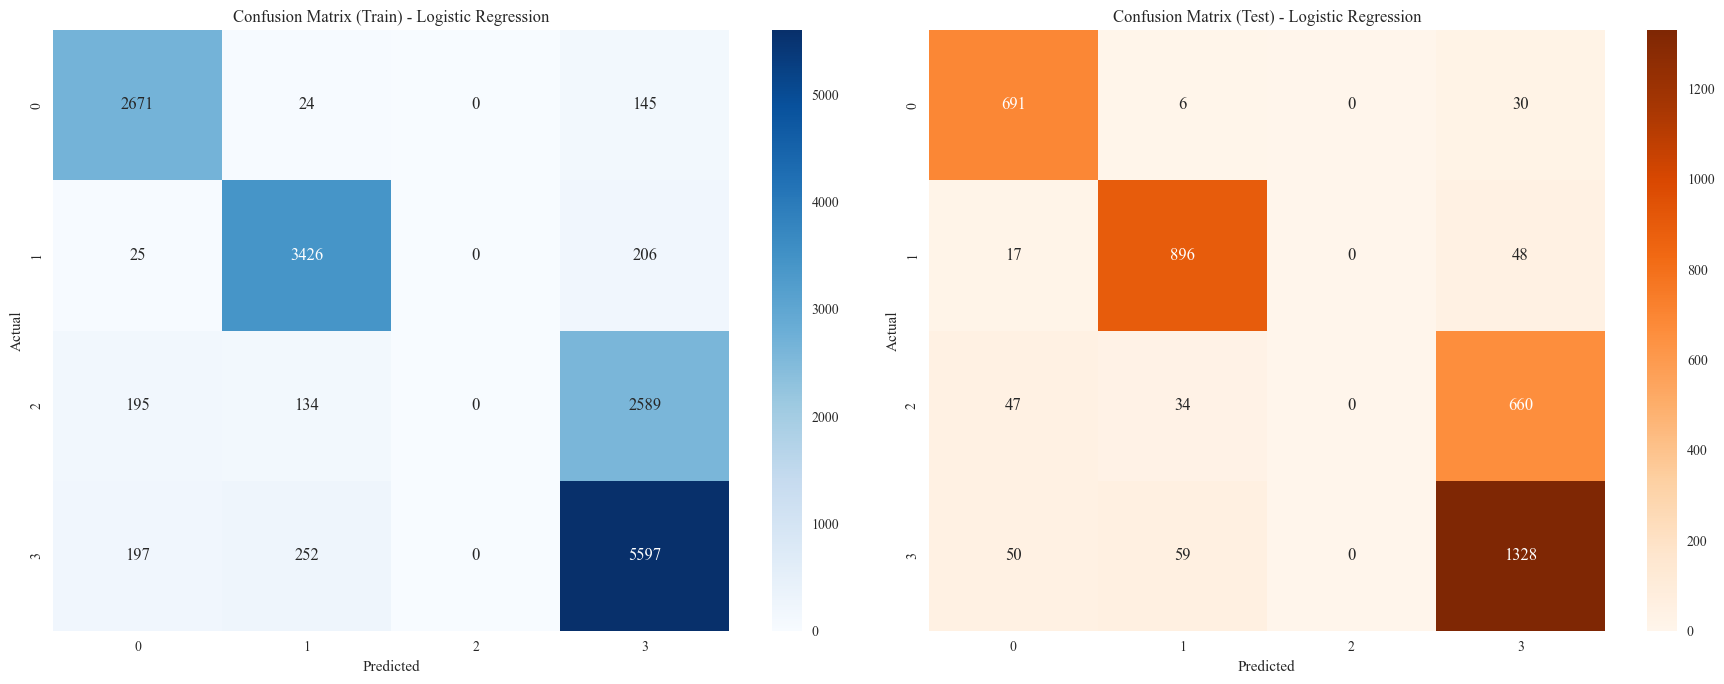

Train Accuracy: 0.7564
Test Accuracy: 0.754

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2840
           1       0.89      0.94      0.91      3657
           2       0.00      0.00      0.00      2918
           3       0.66      0.93      0.77      6046

    accuracy                           0.76     15461
   macro avg       0.60      0.70      0.65     15461
weighted avg       0.63      0.76      0.68     15461


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       727
           1       0.90      0.93      0.92       961
           2       0.00      0.00      0.00       741
           3       0.64      0.92      0.76      1437

    accuracy                           0.75      3866
   macro avg       0.60      0.70      0.64      3866
weighted avg       0.62      0.75      0.68      3866



In [81]:
best_logreg = grid_search.best_estimator_
y_train_pred_logreg = best_logreg.predict(X_train)
y_test_pred_logreg = best_logreg.predict(X_test)

# Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.heatmap(confusion_matrix(y_train, y_train_pred_logreg), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix (Train) - Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_test_pred_logreg), annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title("Confusion Matrix (Test) - Logistic Regression")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

print("Train Accuracy:", round(accuracy_score(y_train, y_train_pred_logreg), 4))
print("Test Accuracy:", round(accuracy_score(y_test, y_test_pred_logreg), 4))

# Classification Report
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred_logreg))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred_logreg))


## 3.2. Random Forest

In [61]:
rf_model = RandomForestClassifier(random_state=123)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_model)
])

param_distributions = {
    'classifier__n_estimators': randint(100, 300),
    'classifier__max_depth': randint(3, 20),
    'classifier__min_samples_split': randint(2, 10),
    'classifier__min_samples_leaf': randint(1, 10),
    'classifier__max_features': ['sqrt', 'log2', None],
    'classifier__criterion': ['gini', 'entropy']
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

random_search_rf = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=20,
    cv=skf,
    verbose=1,
    n_jobs=-1,
    random_state=123
)

random_search_rf.fit(X_train, y_train)

print("Best Parameters Found:")
print(random_search_rf.best_params_)
print("Best Cross-Validation Score (during search):", round(random_search_rf.best_score_, 4))
  

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters Found:
{'classifier__criterion': 'entropy', 'classifier__max_depth': 18, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 7, 'classifier__n_estimators': 204}
Best Cross-Validation Score (during search): 0.9718


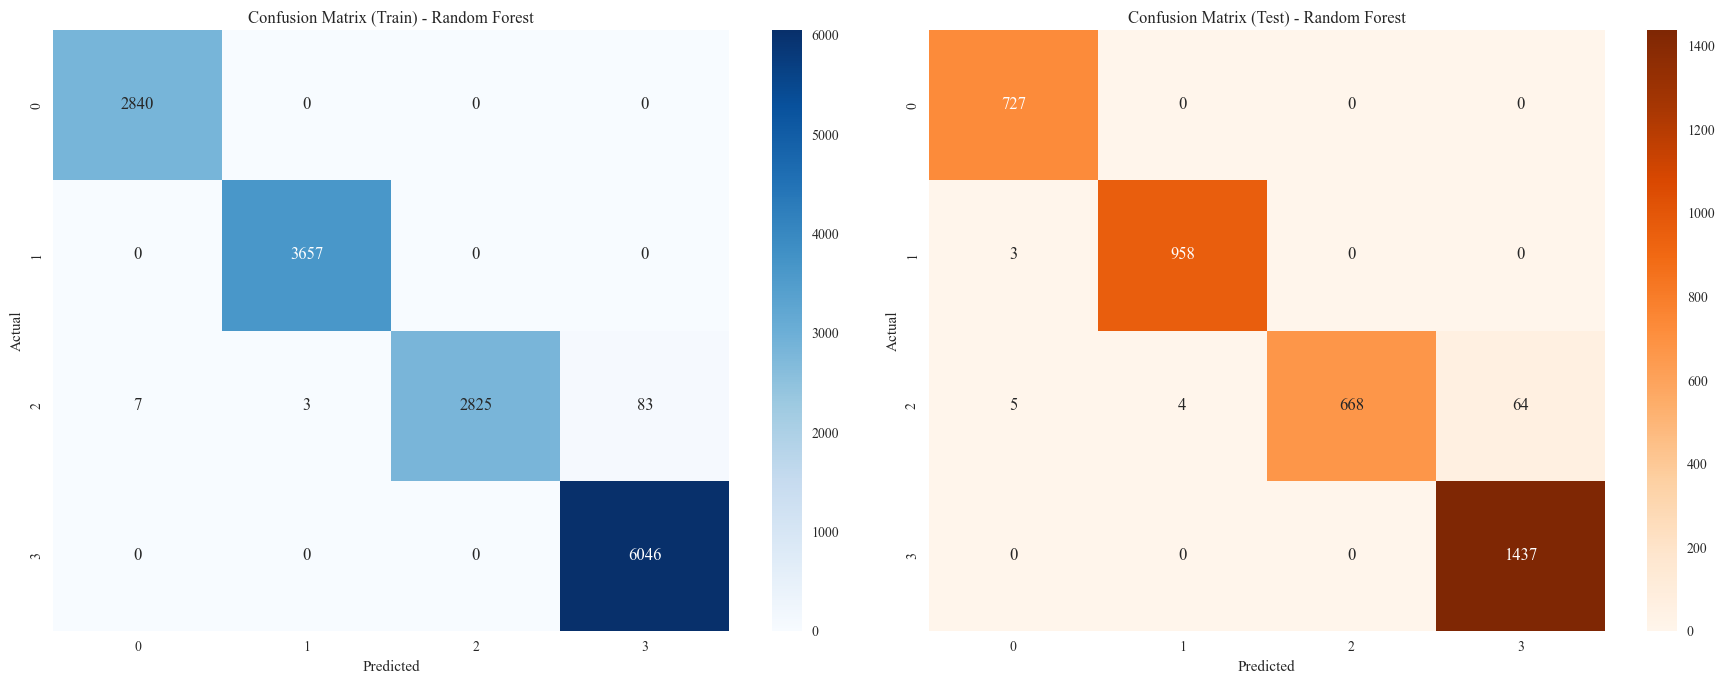

Accuracy (Train): 0.994
Accuracy (Test): 0.9803

Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2840
           1       1.00      1.00      1.00      3657
           2       1.00      0.97      0.98      2918
           3       0.99      1.00      0.99      6046

    accuracy                           0.99     15461
   macro avg       1.00      0.99      0.99     15461
weighted avg       0.99      0.99      0.99     15461

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       727
           1       1.00      1.00      1.00       961
           2       1.00      0.90      0.95       741
           3       0.96      1.00      0.98      1437

    accuracy                           0.98      3866
   macro avg       0.99      0.97      0.98      3866
weighted avg       0.98      0.98      0.98      3866

Cross-Validation Acc

In [62]:
best_rf = random_search_rf.best_estimator_
y_train_pred_rf = best_rf.predict(X_train)
y_test_pred_rf = best_rf.predict(X_test)

# Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.heatmap(confusion_matrix(y_train, y_train_pred_rf),
            annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix (Train) - Random Forest")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_test_pred_rf),
            annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title("Confusion Matrix (Test) - Random Forest")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

acc_train = accuracy_score(y_train, y_train_pred_rf)
acc_test = accuracy_score(y_test, y_test_pred_rf)

print("Accuracy (Train):", round(acc_train, 4))
print("Accuracy (Test):", round(acc_test, 4))

# Classification Report 
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred_rf))

print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred_rf))

cv_scores = cross_val_score(best_rf, X_train, y_train, cv=skf, scoring='accuracy')
print("Cross-Validation Accuracy (Train):", round(cv_scores.mean(), 4))

## 3.3. HistGradientBoostingClassifier

In [64]:
hgb_model = HistGradientBoostingClassifier(random_state=123)
pipeline_hgb = make_pipeline(preprocessor, hgb_model)

param_distributions_hgb = {
    'histgradientboostingclassifier__learning_rate': loguniform(0.001, 1),
    'histgradientboostingclassifier__l2_regularization': loguniform(1e-6, 1),
    'histgradientboostingclassifier__max_leaf_nodes': randint(10, 150),
    'histgradientboostingclassifier__min_samples_leaf': randint(10, 100),
    'histgradientboostingclassifier__max_bins': randint(4, 255),
}

random_search_hgb = RandomizedSearchCV(
    estimator=pipeline_hgb,
    param_distributions=param_distributions_hgb,
    n_iter=20,
    cv=skf,
    scoring='accuracy',
    verbose=1,
    random_state=123,
    n_jobs=-1
)

random_search_hgb.fit(X_train, y_train)

print("Best Hyperparameters (HistGB):", random_search_hgb.best_params_)
print("Best CV Accuracy (HistGB):", round(random_search_hgb.best_score_, 4))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


python(21534) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Best Hyperparameters (HistGB): {'histgradientboostingclassifier__l2_regularization': 0.22926353194868113, 'histgradientboostingclassifier__learning_rate': 0.6799548167126569, 'histgradientboostingclassifier__max_bins': 74, 'histgradientboostingclassifier__max_leaf_nodes': 119, 'histgradientboostingclassifier__min_samples_leaf': 36}
Best CV Accuracy (HistGB): 0.982


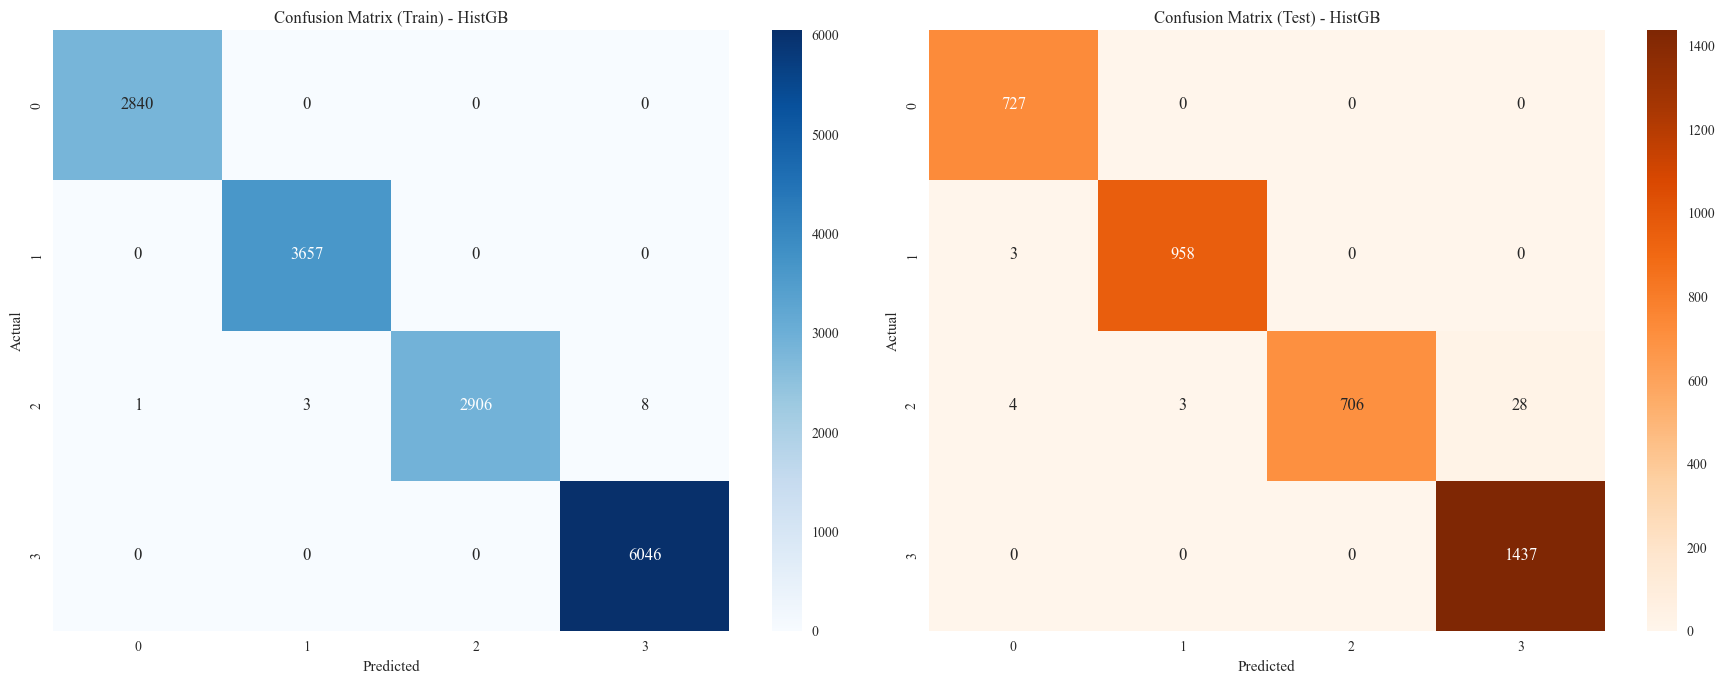

Train Accuracy: 0.9992
Test Accuracy: 0.9902

Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2840
           1       1.00      1.00      1.00      3657
           2       1.00      1.00      1.00      2918
           3       1.00      1.00      1.00      6046

    accuracy                           1.00     15461
   macro avg       1.00      1.00      1.00     15461
weighted avg       1.00      1.00      1.00     15461

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       727
           1       1.00      1.00      1.00       961
           2       1.00      0.95      0.98       741
           3       0.98      1.00      0.99      1437

    accuracy                           0.99      3866
   macro avg       0.99      0.99      0.99      3866
weighted avg       0.99      0.99      0.99      3866



In [65]:
best_hgb = random_search_hgb.best_estimator_
y_train_pred_hgb = best_hgb.predict(X_train)
y_test_pred_hgb = best_hgb.predict(X_test)

# Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.heatmap(confusion_matrix(y_train, y_train_pred_hgb),
            annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix (Train) - HistGB")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_test_pred_hgb),
            annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title("Confusion Matrix (Test) - HistGB")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

print("Train Accuracy:", round(accuracy_score(y_train, y_train_pred_hgb), 4))
print("Test Accuracy:", round(accuracy_score(y_test, y_test_pred_hgb), 4))

# Classification Report
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred_hgb))

print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred_hgb))

## 3.4. XGB Classifer

In [51]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=123)
pipeline_xgb = make_pipeline(preprocessor, xgb_model)

param_distributions_xgb = {
    'xgbclassifier__n_estimators': randint(100, 300),
    'xgbclassifier__max_depth': randint(3, 10),
    'xgbclassifier__learning_rate': uniform(0.01, 0.3),
    'xgbclassifier__subsample': uniform(0.5, 0.5),
    'xgbclassifier__colsample_bytree': uniform(0.5, 0.5),
    'xgbclassifier__gamma': uniform(0, 5),
    'xgbclassifier__reg_alpha': uniform(0, 1),
    'xgbclassifier__reg_lambda': uniform(0, 1)
}

random_search_xgb = RandomizedSearchCV(
    estimator=pipeline_xgb,
    param_distributions=param_distributions_xgb,
    n_iter=20,
    cv=skf,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    random_state=123
)

random_search_xgb.fit(X_train, y_train)

print("Best Hyperparameters (XGBoost):", random_search_xgb.best_params_)
print("Best CV Accuracy (XGBoost):", round(random_search_xgb.best_score_, 4))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:22:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:22:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:22:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:22:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packa

Best Hyperparameters (XGBoost): {'xgbclassifier__colsample_bytree': 0.9211712188101286, 'xgbclassifier__gamma': 0.41597494166219384, 'xgbclassifier__learning_rate': 0.23910485243300145, 'xgbclassifier__max_depth': 4, 'xgbclassifier__n_estimators': 298, 'xgbclassifier__reg_alpha': 0.19422296057877086, 'xgbclassifier__reg_lambda': 0.5724569574914731, 'xgbclassifier__subsample': 0.5478562583061936}
Best CV Accuracy (XGBoost): 0.9586


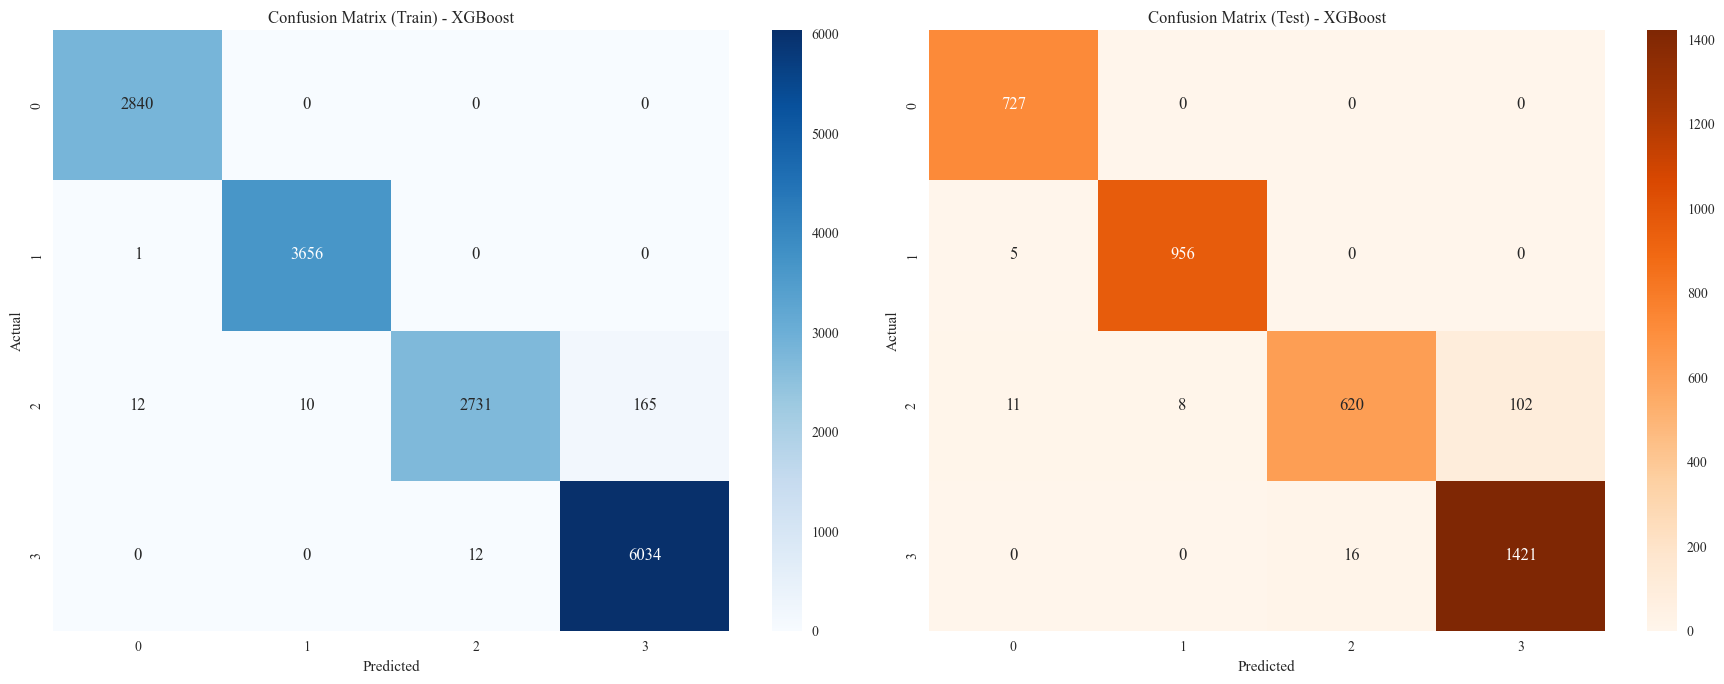

Train Accuracy: 0.9871
Test Accuracy: 0.9633

Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2840
           1       1.00      1.00      1.00      3657
           2       1.00      0.94      0.96      2918
           3       0.97      1.00      0.99      6046

    accuracy                           0.99     15461
   macro avg       0.99      0.98      0.99     15461
weighted avg       0.99      0.99      0.99     15461

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       727
           1       0.99      0.99      0.99       961
           2       0.97      0.84      0.90       741
           3       0.93      0.99      0.96      1437

    accuracy                           0.96      3866
   macro avg       0.97      0.96      0.96      3866
weighted avg       0.96      0.96      0.96      3866



In [87]:
best_xgb = random_search_xgb.best_estimator_
y_train_pred_xgb = best_xgb.predict(X_train)
y_test_pred_xgb = best_xgb.predict(X_test)

# Confusion Matrix 
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.heatmap(confusion_matrix(y_train, y_train_pred_xgb),
            annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix (Train) - XGBoost")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_test_pred_xgb),
            annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title("Confusion Matrix (Test) - XGBoost")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

print("Train Accuracy:", round(accuracy_score(y_train, y_train_pred_xgb), 4))
print("Test Accuracy:", round(accuracy_score(y_test, y_test_pred_xgb), 4))

# --- Classification Report ---
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred_xgb))

print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred_xgb))

## 3.5. MLP

In [70]:
mlp_model = MLPClassifier(random_state=123, max_iter=500)
pipeline_mlp = make_pipeline(preprocessor, mlp_model)

param_grid_mlp = {
    'mlpclassifier__hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'mlpclassifier__activation': ['relu', 'tanh'],
    'mlpclassifier__alpha': [0.0001, 0.001, 0.01],
    'mlpclassifier__solver': ['adam', 'lbfgs']
}

grid_search_mlp = GridSearchCV(
    estimator=pipeline_mlp,
    param_grid=param_grid_mlp,
    cv=skf,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search_mlp.fit(X_train, y_train)

print("Best Hyperparameters (MLP):", grid_search_mlp.best_params_)
print("Best CV Accuracy (MLP):", round(grid_search_mlp.best_score_, 4))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

Best Hyperparameters (MLP): {'mlpclassifier__activation': 'tanh', 'mlpclassifier__alpha': 0.01, 'mlpclassifier__hidden_layer_sizes': (100, 50), 'mlpclassifier__solver': 'adam'}
Best CV Accuracy (MLP): 0.9738


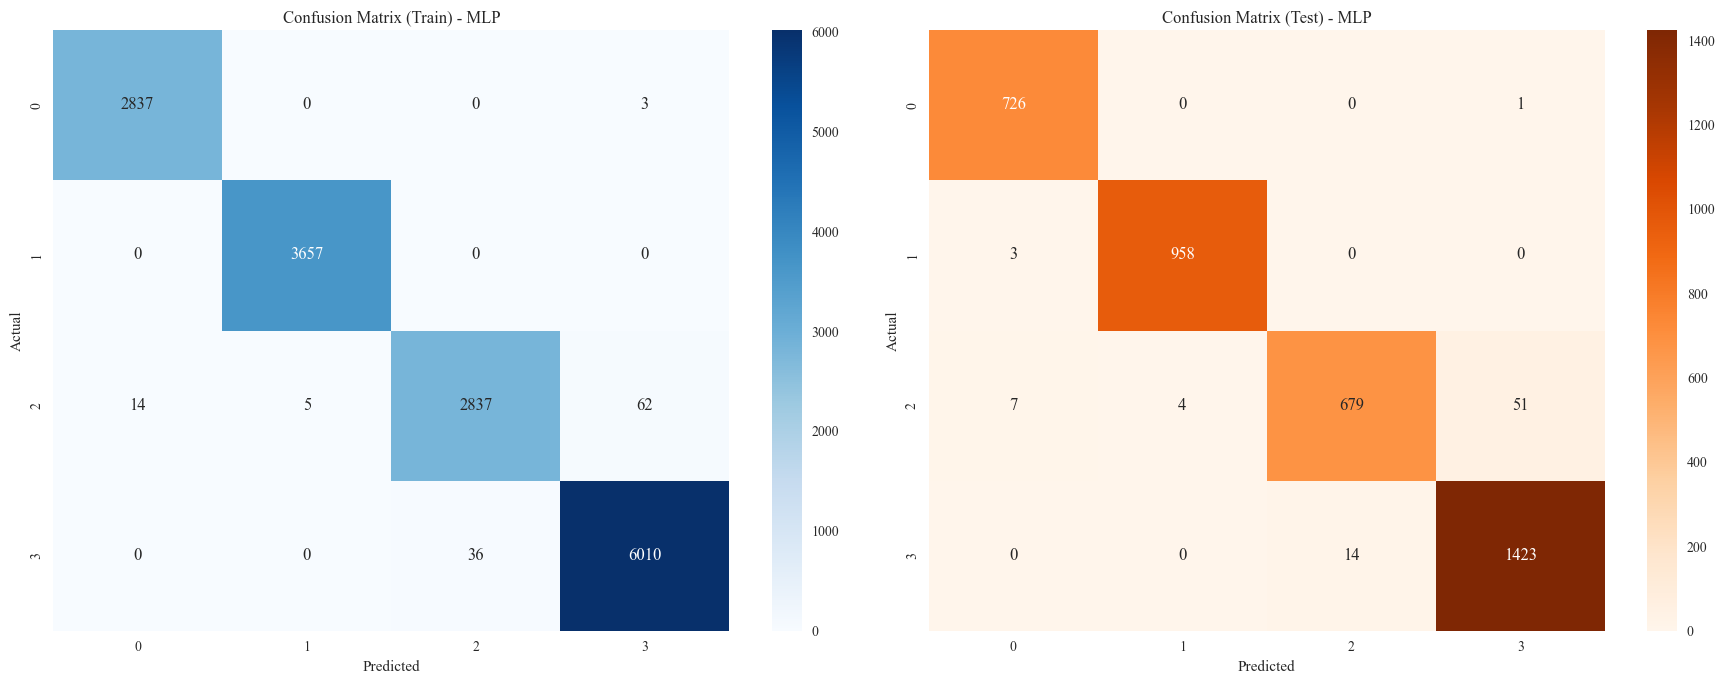

Train Accuracy: 0.9922
Test Accuracy: 0.9793

Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2840
           1       1.00      1.00      1.00      3657
           2       0.99      0.97      0.98      2918
           3       0.99      0.99      0.99      6046

    accuracy                           0.99     15461
   macro avg       0.99      0.99      0.99     15461
weighted avg       0.99      0.99      0.99     15461

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       727
           1       1.00      1.00      1.00       961
           2       0.98      0.92      0.95       741
           3       0.96      0.99      0.98      1437

    accuracy                           0.98      3866
   macro avg       0.98      0.98      0.98      3866
weighted avg       0.98      0.98      0.98      3866



In [71]:
best_mlp = grid_search_mlp.best_estimator_
y_train_pred_mlp = best_mlp.predict(X_train)
y_test_pred_mlp = best_mlp.predict(X_test)

# Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.heatmap(confusion_matrix(y_train, y_train_pred_mlp),
            annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix (Train) - MLP")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_test_pred_mlp),
            annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title("Confusion Matrix (Test) - MLP")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

print("Train Accuracy:", round(accuracy_score(y_train, y_train_pred_mlp), 4))
print("Test Accuracy:", round(accuracy_score(y_test, y_test_pred_mlp), 4))

# Classification Report 
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred_mlp))

print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred_mlp))

# 4. Results

In [85]:
summary = []

# Random Forest
summary.append({
    "Model": "Random Forest",
    "Train Accuracy": round(accuracy_score(y_train, y_train_pred_rf), 4),
    "Test Accuracy": round(accuracy_score(y_test, y_test_pred_rf), 4),
    "CV Score": round(random_search_rf.best_score_, 4)
})

# HistGradientBoosting
summary.append({
    "Model": "HistGradientBoosting",
    "Train Accuracy": round(accuracy_score(y_train, y_train_pred_hgb), 4),
    "Test Accuracy": round(accuracy_score(y_test, y_test_pred_hgb), 4),
    "CV Score": round(random_search_hgb.best_score_, 4)
})

# XGBoost
summary.append({
    "Model": "XGBoost",
    "Train Accuracy": round(accuracy_score(y_train, y_train_pred_xgb), 4),
    "Test Accuracy": round(accuracy_score(y_test, y_test_pred_xgb), 4),
    "CV Score": round(random_search_xgb.best_score_, 4)
})

# MLPClassifier
summary.append({
    "Model": "MLPClassifier",
    "Train Accuracy": round(accuracy_score(y_train, y_train_pred_mlp), 4),
    "Test Accuracy": round(accuracy_score(y_test, y_test_pred_mlp), 4),
    "CV Score": round(grid_search_mlp.best_score_, 4)
})

# Logistic Regression
summary.append({
    "Model": "Logistic Regression",
    "Train Accuracy": round(accuracy_score(y_train, y_train_pred_logreg), 4),
    "Test Accuracy": round(accuracy_score(y_test, y_test_pred_logreg), 4),
    "CV Score": round(grid_search.best_score_, 4) 
})

accuracy_df = pd.DataFrame(summary)


In [89]:
accuracy_df

,Model,Train Accuracy,Test Accuracy,CV Score
0,Random Forest,0.9940,0.9803,0.9718
1,HistGradientBoosting,0.9992,0.9902,0.9820
2,XGBoost,0.9871,0.9633,0.9586
3,MLPClassifier,0.9922,0.9793,0.9738
4,Logistic Regression,0.7564,0.7540,0.7563


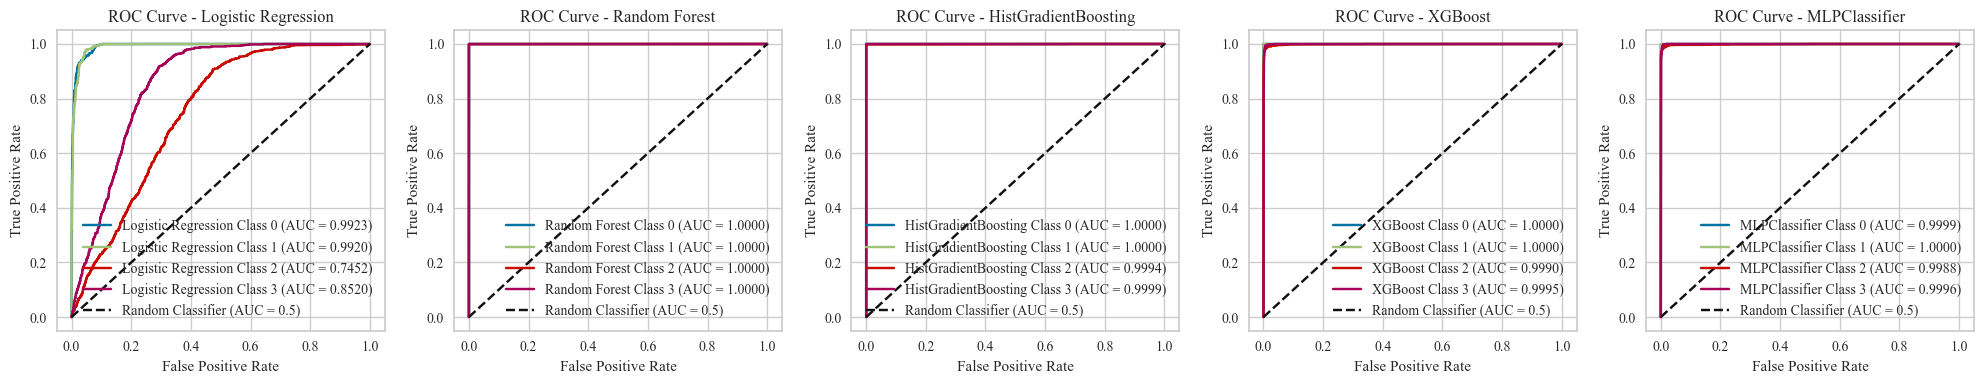

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
num_classes=4

y_train_bin = label_binarize(y_train, classes=range(num_classes))
y_test_bin = label_binarize(y_test, classes=range(num_classes))


def plot_roc_curve_for_multiclass(fpr, tpr, auc_score, label, ax):
    ax.plot(fpr, tpr, label=f'{label} (AUC = {auc_score:.4f})')

def plot_roc(model, model_name, X_train, y_train_bin, ax):
    y_train_prob = model.predict_proba(X_train)
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_train_bin[:, i], y_train_prob[:, i])
        auc_score = auc(fpr, tpr)
        plot_roc_curve_for_multiclass(fpr, tpr, auc_score, f'{model_name} Class {i}', ax)
    ax.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)') 
    ax.set_title(f'ROC Curve - {model_name}')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc='lower right')

fig, axs = plt.subplots(1, 5, figsize=(20, 4))

# --- Logistic Regression ---
plot_roc(grid_search.best_estimator_, "Logistic Regression", X_train, y_train_bin, axs[0])

# --- Random Forest ---
plot_roc(random_search_rf.best_estimator_, "Random Forest", X_train, y_train_bin, axs[1])

# --- HistGradientBoosting ---
plot_roc(random_search_hgb.best_estimator_, "HistGradientBoosting", X_train, y_train_bin, axs[2])

# --- XGBoost ---
plot_roc(random_search_xgb.best_estimator_, "XGBoost", X_train, y_train_bin, axs[3])

# --- MLPClassifier ---
plot_roc(grid_search_mlp.best_estimator_, "MLPClassifier", X_train, y_train_bin, axs[4])

# Hiển thị các biểu đồ
plt.tight_layout()
plt.show()


In [69]:
best_xgb = random_search_xgb.best_estimator_  
y_pred_newcus_xgb = best_xgb.predict(newcus_df)

newcus_df['clusters_predict'] = y_pred_newcus_xgb

In [70]:
newcus_df

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,property_valuation,state,customer_age,age_group,tenure_valuation_mul,tenure_valuation_div,clusters_predict
0,Male,86,General Manager,Manufacturing,Mass Customer,No,Yes,14,6,QLD,60,Senior,84,2.333333,0
1,Male,69,Structural Engineer,Property,Mass Customer,No,No,16,11,NSW,47,Mid-age,176,1.454545,3
2,Female,10,Senior Cost Accountant,Financial Services,Affluent Customer,No,No,10,5,VIC,43,Mid-age,50,2.000000,0
3,Female,64,Account Representative III,Manufacturing,Affluent Customer,No,Yes,5,1,QLD,38,Mid-age,5,5.000000,0
4,Female,34,Financial Analyst,Financial Services,Affluent Customer,No,No,19,9,NSW,52,Senior,171,2.111111,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Male,60,Paralegal,Financial Services,Affluent Customer,No,No,9,7,NSW,58,Senior,63,1.285714,2
996,Male,22,Senior Sales Associate,Health,Mass Customer,No,No,6,10,NSW,16,Teen,60,0.600000,1
997,Female,17,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,No,Yes,15,2,QLD,63,Senior,30,7.500000,0
998,Male,30,Financial Advisor,Financial Services,Mass Customer,No,Yes,19,2,QLD,65,Senior,38,9.500000,0


                                Feature  Importance
2                             job_title    0.305479
1   past_3_years_bike_related_purchases    0.254447
4                        wealth_segment    0.083532
5                    deceased_indicator    0.078551
3                 job_industry_category    0.048634
10                         customer_age    0.033189
12                 tenure_valuation_mul    0.028918
7                                tenure    0.028816
0                                gender    0.028647
6                              owns_car    0.028429
8                    property_valuation    0.027963
13                 tenure_valuation_div    0.027145
9                                 state    0.026250
11                            age_group    0.000000


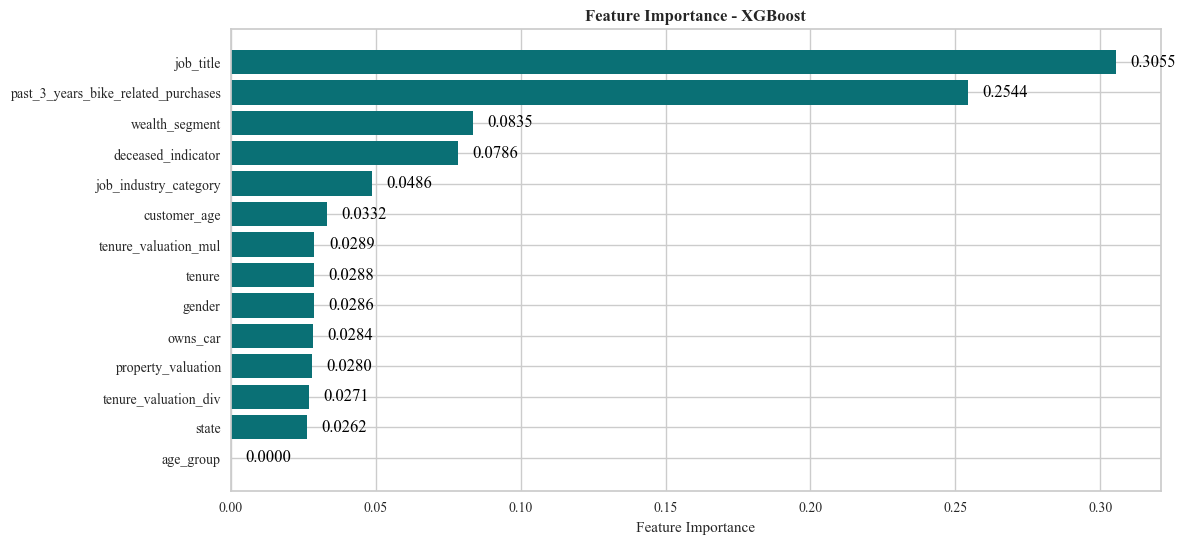

In [93]:
xgb_model = best_xgb.named_steps['xgbclassifier']

feature_importances = xgb_model.feature_importances_

if hasattr(preprocessor, 'transformers_'):
    feature_names = numerical_features + categorical_features  
else:
    feature_names = X_train.columns  
    
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(12, 6))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=pal[3])
plt.xlabel('Feature Importance')
plt.title('Feature Importance - XGBoost', fontweight='bold')

for bar in bars:
    width = bar.get_width()  
    plt.text(width + 0.005, bar.get_y() + bar.get_height() / 2, f'{width:.4f}', 
             va='center', ha='left', color='black')

plt.gca().invert_yaxis() 
plt.show()

# Explore Newcus Cluster

In [90]:
newcus_demo= newcus_df.select_dtypes(include=['Int64', 'Float64']).groupby('clusters_predict').mean().round(2)
newcus_demo

,past_3_years_bike_related_purchases,tenure,property_valuation,customer_age,tenure_valuation_mul,tenure_valuation_div
clusters_predict,,,,,,
0,49.50,11.54,3.23,48.41,36.99,4.67
1,51.30,4.75,8.22,28.27,39.27,0.61
2,51.89,12.00,8.31,55.68,98.86,1.68
3,48.38,13.64,8.74,46.91,118.04,1.64


In [78]:
newcus_df.columns

Index(['gender', 'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'property_valuation', 'state', 'customer_age',
       'age_group', 'tenure_valuation_mul', 'tenure_valuation_div',
       'clusters_predict'],
      dtype='object')

In [81]:
newcuscol=['gender', 'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'property_valuation', 'state', 'customer_age',
       'age_group', 'tenure_valuation_mul', 'tenure_valuation_div','clusters']

In [89]:
oldcus_demo=train[newcuscol].select_dtypes(include=['Int64', 'Float64']).groupby('clusters').mean().round(2)
oldcus_demo

,past_3_years_bike_related_purchases,tenure,property_valuation,customer_age,tenure_valuation_mul,tenure_valuation_div
clusters,,,,,,
0,48.04,11.65,3.05,41.77,36.05,5.21
1,49.70,3.73,8.16,27.01,30.91,0.49
2,49.57,12.91,8.44,45.03,108.76,1.65
3,48.58,13.42,8.79,44.35,117.11,1.61


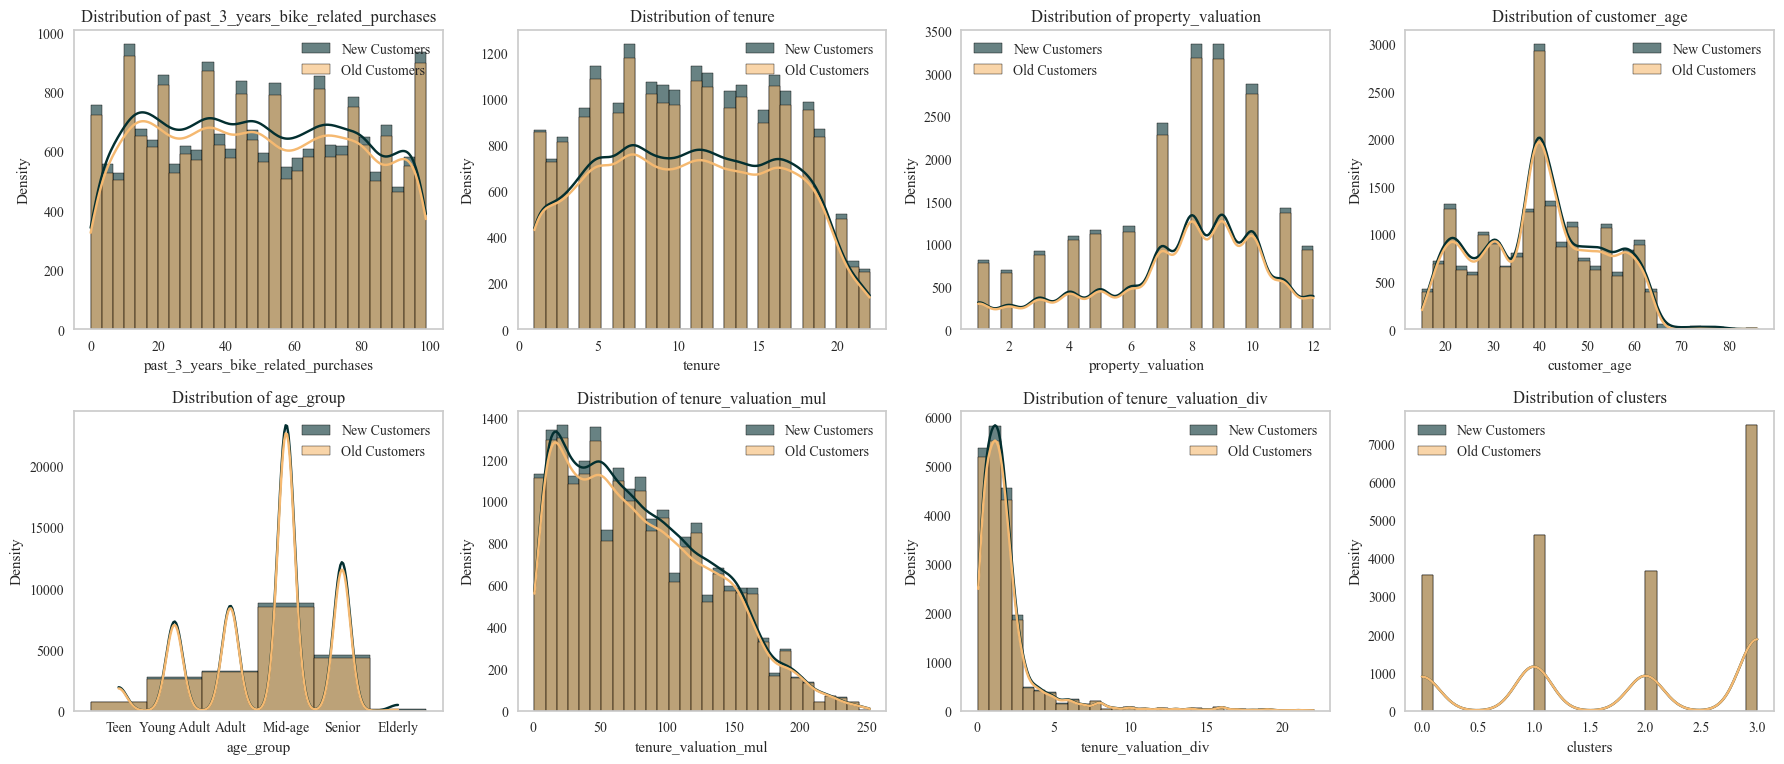

In [131]:
newcus_df['Customer_Type'] = 'New Customer'
train['Customer_Type'] = 'Old Customer'
combined_df = pd.concat([newcus_df, train])

columns_to_compare = ['gender', 'past_3_years_bike_related_purchases', 'job_title', 
                      'job_industry_category', 'wealth_segment',
                      'owns_car', 'tenure', 'property_valuation', 'state', 
                      'customer_age', 'age_group', 'tenure_valuation_mul', 
                      'tenure_valuation_div', 'clusters']

top_5_job_titles = combined_df['job_title'].value_counts().nlargest(5).index
combined_df['job_title'] = combined_df['job_title'].where(combined_df['job_title'].isin(top_5_job_titles), 'Other')

categorical_columns = [col for col in columns_to_compare if combined_df[col].dtype == 'object']
categorical_columns = categorical_columns[:7]

numeric_columns = [col for col in columns_to_compare if combined_df[col].dtype != 'object']

plt.figure(figsize=(18, 15))
for i, column in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(combined_df[column], kde=True, color=pal_1[0], label='New Customers', bins=30, alpha=0.6)
    sns.histplot(combined_df[combined_df['Customer_Type'] == 'Old Customer'][column], kde=True, color=pal_1[6], label='Old Customers', bins=30, alpha=0.6)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(False)

plt.tight_layout()
plt.show()




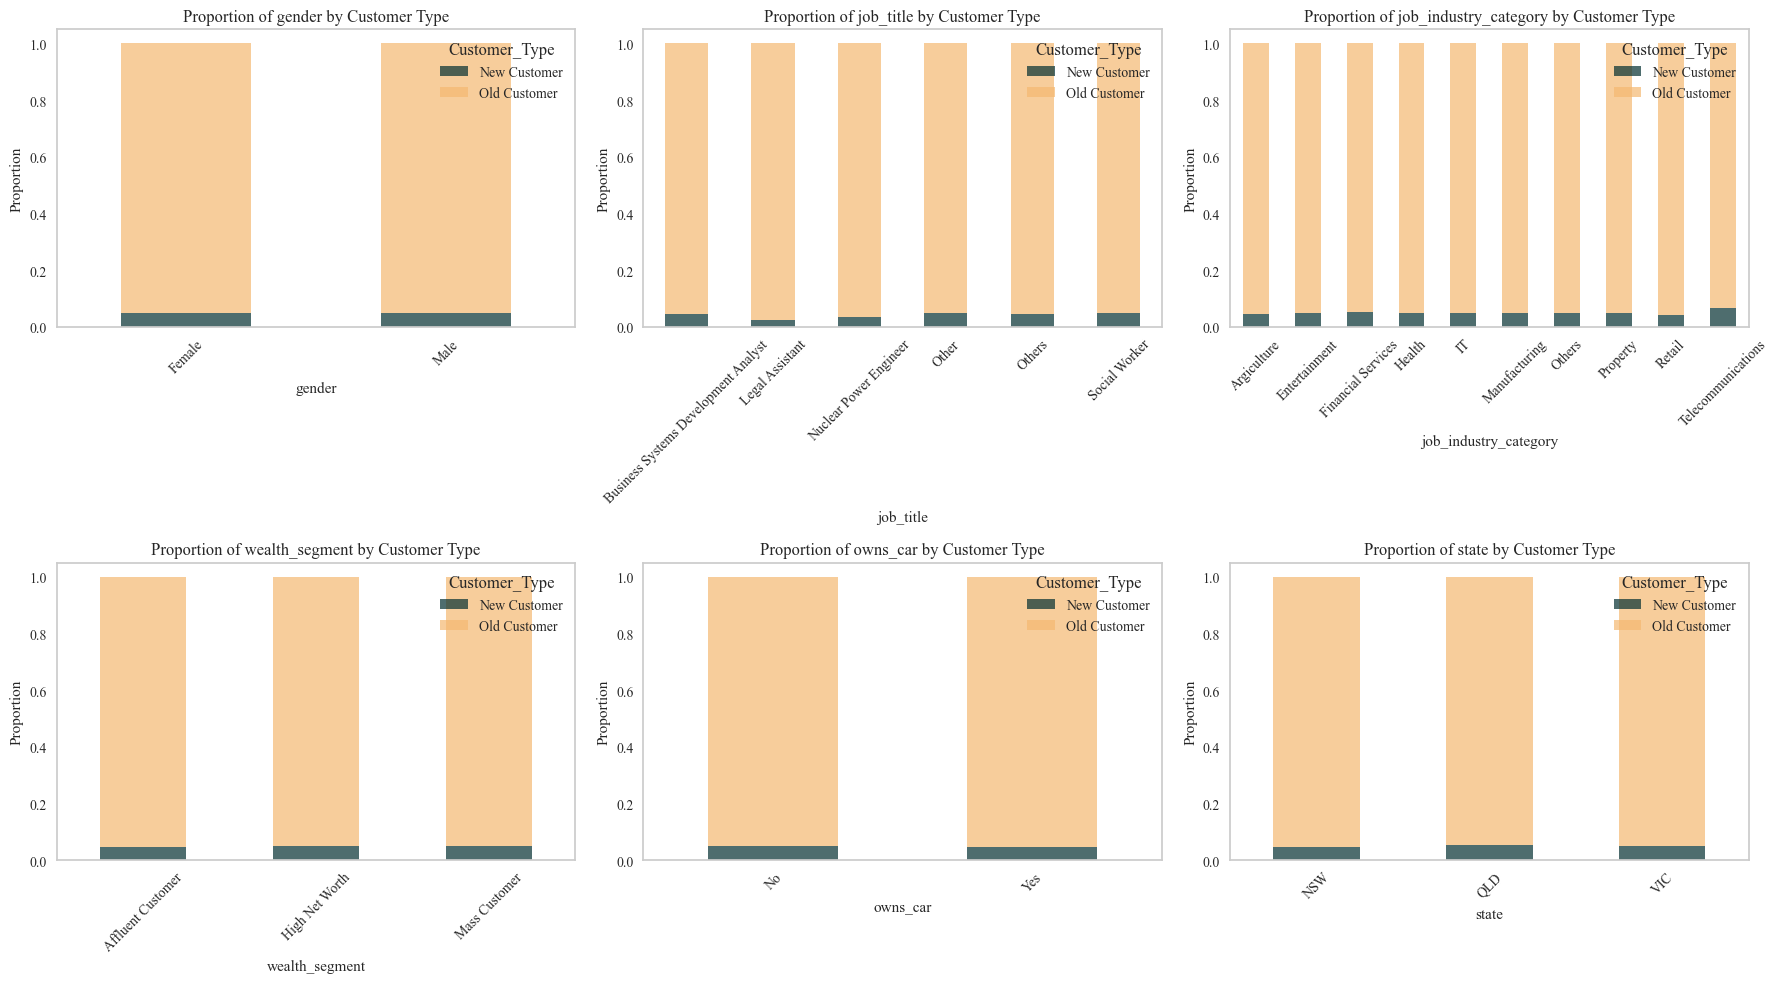

In [135]:
# Plotting proportion plots for categorical columns
plt.figure(figsize=(18, 10))
for i, column in enumerate(categorical_columns):
    plt.subplot(2, 3, i + 1)
    
    customer_type_proportions = combined_df.groupby([column, 'Customer_Type']).size().unstack().fillna(0)
    customer_type_proportions = customer_type_proportions.div(customer_type_proportions.sum(axis=1), axis=0)
    
    customer_type_proportions.plot(kind='bar', stacked=True, ax=plt.gca(), alpha=0.7, color=[pal_1[0], pal_1[6]])
    
    plt.title(f'Proportion of {column} by Customer Type')
    plt.xlabel(column)
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.grid(False)

plt.tight_layout()
plt.show()